# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)   

# Print the city count to confirm sufficient count
print(len(cities))

602


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#call example parameters
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "Mexico"
units = "metric"

In [4]:
# Build query URL and request your results in Celsius
query_url = f"{url}appid={api_key}&q={city}&units={units}"

query_url


'http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=Mexico&units=metric'

In [5]:
# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()

weather_json

{'coord': {'lon': -70.55, 'lat': 44.56},
 'weather': [{'id': 600,
   'main': 'Snow',
   'description': 'light snow',
   'icon': '13n'}],
 'base': 'stations',
 'main': {'temp': -4.65,
  'pressure': 1023,
  'humidity': 78,
  'temp_min': -8,
  'temp_max': -3.3},
 'visibility': 4828,
 'wind': {'speed': 3.1, 'deg': 290},
 'clouds': {'all': 90},
 'dt': 1545862500,
 'sys': {'type': 1,
  'id': 3130,
  'message': 0.0249,
  'country': 'US',
  'sunrise': 1545826684,
  'sunset': 1545858516},
 'id': 4971871,
 'name': 'Mexico',
 'cod': 200}

In [6]:
# Get temperature from JSON response
temperature = weather_json["main"]["temp"]
temperature

-4.65

In [7]:

unit='metric'
i=0
# list for information to gather
temperatures=[]
cloudiness=[]
countries=[]
dates=[]
humidities=[]
lats=[]
lngs=[]
maxTemps=[]
windSpeeds=[]
ctyfound=[]
ctynotfound=[]

# loop throught the list of units and append them to temperatures list
for city in cities:

    # Build query URL based on current element in units
       
    query_url = str(url) + "appid=" + str(api_key) + "&q=" + str(city) + "&units=" + str(unit)
    
    
    i=i+1
    
    try: 
        
        # Get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        print(f'Processing Record:Record Number {i}; CityName:{city}')   
        
        # Get data from json file
                
        temperature = weather_json["main"]["temp"]
        cloud=weather_json["clouds"]["all"]
        country=weather_json["sys"]["country"]
        date=weather_json["dt"]
        humidity=weather_json["main"]["humidity"]
        lat=weather_json["coord"]["lat"]
        lng=weather_json["coord"]["lon"]
        maxTemp=weather_json["main"]["temp_max"]
        windSpeed=weather_json["wind"]["speed"]
        
        ctyfound.append(city)
        temperatures.append(temperature)
        cloudiness.append(cloud)
        countries.append(country)
        dates.append(date)
        humidities.append(humidity)
        lats.append(lat)
        lngs.append(lng)
        maxTemps.append(maxTemp)
        windSpeeds.append(windSpeed)
        
    except:
        
        print(f'NOT FOUND...Skipping Record Number {i}; CityName:{city}')
        ctynotfound.append(city)
        
        pass
    
    
 


Processing Record:Record Number 1; CityName:punta arenas; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=punta arenas&units=metric
Processing Record:Record Number 2; CityName:hobart; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=hobart&units=metric
Processing Record:Record Number 3; CityName:bluff; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=bluff&units=metric
Processing Record:Record Number 4; CityName:adzope; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=adzope&units=metric
Processing Record:Record Number 5; CityName:mataura; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=mataura&units=metric
Processing Record:Record Number 6; CityName:kaitangata; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c4367

Processing Record:Record Number 48; CityName:hermanus; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=hermanus&units=metric
Processing Record:Record Number 49; CityName:jaromerice nad rokytnou; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=jaromerice nad rokytnou&units=metric
Processing Record:Record Number 50; CityName:barentsburg; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=barentsburg&units=metric
NOT FOUND...Skipping Record Number 50; CityName:barentsburg
Processing Record:Record Number 51; CityName:itarema; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=itarema&units=metric
Processing Record:Record Number 52; CityName:kuzino; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=kuzino&units=metric
Processing Record:Record Number 53; City

Processing Record:Record Number 94; CityName:tsihombe; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=tsihombe&units=metric
NOT FOUND...Skipping Record Number 94; CityName:tsihombe
Processing Record:Record Number 95; CityName:tuktoyaktuk; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=tuktoyaktuk&units=metric
Processing Record:Record Number 96; CityName:champerico; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=champerico&units=metric
Processing Record:Record Number 97; CityName:avarua; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=avarua&units=metric
Processing Record:Record Number 98; CityName:bredasdorp; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=bredasdorp&units=metric
Processing Record:Record Number 99; CityName:ugento; QueryURL=h

Processing Record:Record Number 140; CityName:carnarvon; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=carnarvon&units=metric
Processing Record:Record Number 141; CityName:mount gambier; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=mount gambier&units=metric
Processing Record:Record Number 142; CityName:najran; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=najran&units=metric
Processing Record:Record Number 143; CityName:san quintin; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=san quintin&units=metric
Processing Record:Record Number 144; CityName:bethel; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=bethel&units=metric
Processing Record:Record Number 145; CityName:north bend; QueryURL=http://api.openweathermap.org/data/2.5/weather?a

Processing Record:Record Number 186; CityName:yenagoa; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=yenagoa&units=metric
Processing Record:Record Number 187; CityName:amderma; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=amderma&units=metric
NOT FOUND...Skipping Record Number 187; CityName:amderma
Processing Record:Record Number 188; CityName:constitucion; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=constitucion&units=metric
Processing Record:Record Number 189; CityName:bodden town; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=bodden town&units=metric
Processing Record:Record Number 190; CityName:thayetmyo; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=thayetmyo&units=metric
Processing Record:Record Number 191; CityName:saskylakh;

Processing Record:Record Number 233; CityName:kindu; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=kindu&units=metric
Processing Record:Record Number 234; CityName:port-gentil; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=port-gentil&units=metric
Processing Record:Record Number 235; CityName:oussouye; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=oussouye&units=metric
Processing Record:Record Number 236; CityName:freeport; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=freeport&units=metric
Processing Record:Record Number 237; CityName:mbengwi; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=mbengwi&units=metric
Processing Record:Record Number 238; CityName:egvekinot; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b

Processing Record:Record Number 279; CityName:ambon; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=ambon&units=metric
Processing Record:Record Number 280; CityName:uwayl; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=uwayl&units=metric
NOT FOUND...Skipping Record Number 280; CityName:uwayl
Processing Record:Record Number 281; CityName:mogochin; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=mogochin&units=metric
NOT FOUND...Skipping Record Number 281; CityName:mogochin
Processing Record:Record Number 282; CityName:mutsu; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=mutsu&units=metric
Processing Record:Record Number 283; CityName:mugumu; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=mugumu&units=metric
Processing Record:Record Number 28

Processing Record:Record Number 322; CityName:batagay-alyta; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=batagay-alyta&units=metric
Processing Record:Record Number 323; CityName:lorengau; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=lorengau&units=metric
Processing Record:Record Number 324; CityName:donskoye; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=donskoye&units=metric
Processing Record:Record Number 325; CityName:maniitsoq; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=maniitsoq&units=metric
Processing Record:Record Number 326; CityName:araouane; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=araouane&units=metric
Processing Record:Record Number 327; CityName:krasnopavlivka; QueryURL=http://api.openweathermap.org/data/2.5/wea

Processing Record:Record Number 367; CityName:faya; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=faya&units=metric
Processing Record:Record Number 368; CityName:makakilo city; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=makakilo city&units=metric
Processing Record:Record Number 369; CityName:banikoara; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=banikoara&units=metric
Processing Record:Record Number 370; CityName:ivajlovgrad; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=ivajlovgrad&units=metric
NOT FOUND...Skipping Record Number 370; CityName:ivajlovgrad
Processing Record:Record Number 371; CityName:guadalupe y calvo; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=guadalupe y calvo&units=metric
Processing Record:Record Number 372;

Processing Record:Record Number 413; CityName:souillac; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=souillac&units=metric
Processing Record:Record Number 414; CityName:cayenne; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=cayenne&units=metric
Processing Record:Record Number 415; CityName:atar; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=atar&units=metric
Processing Record:Record Number 416; CityName:taburi; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=taburi&units=metric
NOT FOUND...Skipping Record Number 416; CityName:taburi
Processing Record:Record Number 417; CityName:celestun; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=celestun&units=metric
Processing Record:Record Number 418; CityName:manica; QueryURL=http://api.openweath

Processing Record:Record Number 459; CityName:sistranda; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=sistranda&units=metric
Processing Record:Record Number 460; CityName:port hawkesbury; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=port hawkesbury&units=metric
Processing Record:Record Number 461; CityName:dawlatabad; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=dawlatabad&units=metric
Processing Record:Record Number 462; CityName:byron bay; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=byron bay&units=metric
Processing Record:Record Number 463; CityName:mascote; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=mascote&units=metric
Processing Record:Record Number 464; CityName:tautira; QueryURL=http://api.openweathermap.org/data/2.5/we

Processing Record:Record Number 505; CityName:kaoma; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=kaoma&units=metric
Processing Record:Record Number 506; CityName:boguchany; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=boguchany&units=metric
Processing Record:Record Number 507; CityName:poltavka; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=poltavka&units=metric
Processing Record:Record Number 508; CityName:perth; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=perth&units=metric
Processing Record:Record Number 509; CityName:toftir; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=toftir&units=metric
NOT FOUND...Skipping Record Number 509; CityName:toftir
Processing Record:Record Number 510; CityName:namwala; QueryURL=http://api.openweat

Processing Record:Record Number 553; CityName:oistins; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=oistins&units=metric
Processing Record:Record Number 554; CityName:mana; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=mana&units=metric
Processing Record:Record Number 555; CityName:cervo; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=cervo&units=metric
Processing Record:Record Number 556; CityName:olafsvik; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=olafsvik&units=metric
NOT FOUND...Skipping Record Number 556; CityName:olafsvik
Processing Record:Record Number 557; CityName:winsum; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=winsum&units=metric
Processing Record:Record Number 558; CityName:shingu; QueryURL=http://api.openweatherma

Processing Record:Record Number 600; CityName:basco; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=basco&units=metric
Processing Record:Record Number 601; CityName:chunoyar; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=chunoyar&units=metric
Processing Record:Record Number 602; CityName:plouzane; QueryURL=http://api.openweathermap.org/data/2.5/weather?appid=1205305b6503b5009fc8c436728e1ea8&q=plouzane&units=metric


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
df=pd.DataFrame({'cityName':ctyfound,
                 'cloudiness':cloudiness,
                 'country':countries,
                 'date':dates,
                 'humidity':humidities,
                 'lat':lats,
                 'lng':lngs,
                 'maxTemp':maxTemps,
                 'windSpeed':windSpeeds,
                })

In [11]:
df.to_csv(output_data_file)

City  Cloudiness Country        Date  Humidity    Lat     Lng  \
0     lompoc           1      US  1534984500        44  34.64 -120.46   
1   klaksvik          92      FO  1534983600       100  62.23   -6.59   
2  bisignano           0      IT  1534981800        88  39.50   16.27   
3       hilo          90      US  1534984860        90  19.71 -155.08   
4    rikitea           8      PF  1534986579       100 -23.12 -134.97   

   Max Temp  Wind Speed  
0     77.00       11.41  
1     50.00       13.87  
2     66.20        5.82  
3     77.00        8.05  
4     69.58       19.71

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [17]:
date=str(date.today())

#### Latitude vs. Temperature Plot

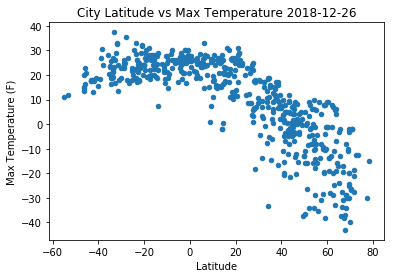

In [27]:
df.plot('lat','maxTemp',kind='scatter')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temperature {date}')
plt.savefig(f'City Latitude vs Max Temperature {date}.png')
plt.show()

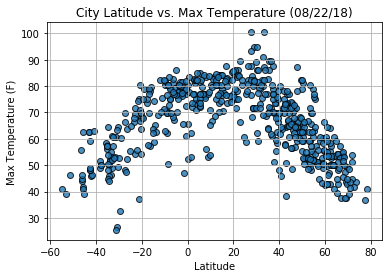

#### Latitude vs. Humidity Plot

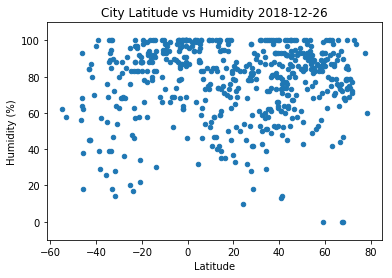

In [32]:
df.plot('lat','humidity',kind='scatter')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(bottom=-10,top=110)
plt.title(f'City Latitude vs Humidity {date}')
plt.savefig(f'City Latitude vs Humidity {date}.png')

plt.show()

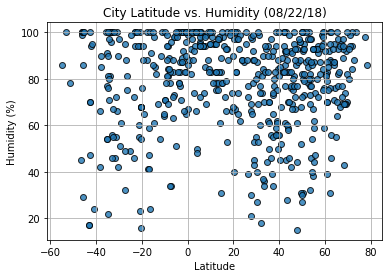

#### Latitude vs. Cloudiness Plot

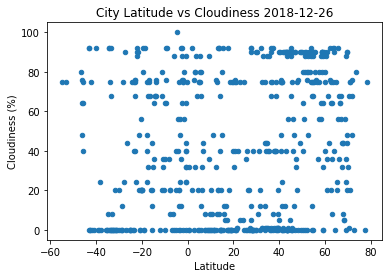

In [34]:
df.plot('lat','cloudiness',kind='scatter')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness {date}')
plt.savefig(f'City Latitude vs Cludiness {date}.png')

plt.show()

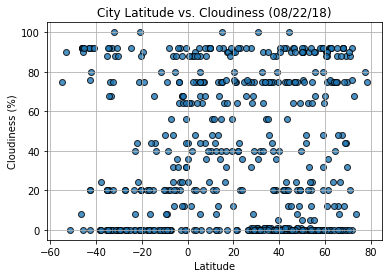

#### Latitude vs. Wind Speed Plot

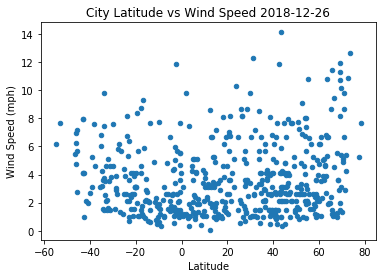

In [33]:
df.plot('lat','windSpeed',kind='scatter')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed {date}')
plt.savefig(f'City Latitude vs WindSpeed {date}.png')

plt.show()

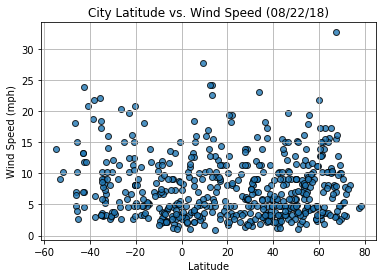

CONCLUSIONS

The graph 'City Latitude vs Max Temperature' shows a none linear relationship correlation between the city latitud and the temperature. ItÂ´s not unreasonable to think that cities around the Equator from -40 to 40 degrees the temperatures remain hight compared to the cities outside this latitudes. To proof this hipotesis, statistical tests are required.

From the Humidity, WindSpeed and Cloudiness, none clear relation with the Latitude can be described, we have cities from any latitude with high or low levels of Humidity, WindSpeed and Cloudiness. To perform a better assesment, statistical tests are required
